# Forecast Crime with ARIMA


In [23]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings
import matplotlib.pyplot as plt


# Suppress warnings
warnings.filterwarnings("ignore")


In [16]:
# load data from the saved clusters
df = pd.read_pickle("area1_clusters.pkl")
df["datetime occ"] = pd.to_datetime(df["datetime occ"])
df.head()

,AREA,Vict Age,LAT,LON,Year OCC,Month OCC,Day OCC,Vict Sex_M,Vict Sex_X,Vict Descent_Asian Indian,...,Category_OTHER THEFT,Category_PERSONAL THFT,Category_RAPE,Category_ROBBERY,Category_SIMPLE ASSAULT,Category_SIMPLE ASSAULT (DV),Category_Trespassing,Category_Vandalism,dbscan_clusters,datetime occ
311225,1,24,34.0466,-118.252,2022,9,19,True,False,False,...,True,False,False,False,False,False,False,False,0,2022-09-19 17:32:00
311341,1,24,34.0466,-118.252,2022,8,21,True,False,False,...,True,False,False,False,False,False,False,False,1,2022-08-21 17:18:00
313258,1,24,34.0466,-118.252,2022,8,28,True,False,False,...,True,False,False,False,False,False,False,False,2,2022-08-28 13:19:00
313436,1,24,34.0466,-118.252,2022,8,20,True,False,False,...,True,False,False,False,False,False,False,False,3,2022-08-20 10:34:00
313470,1,24,34.0466,-118.252,2022,9,9,True,False,False,...,True,False,False,False,False,False,False,False,4,2022-09-09 17:09:00


In [10]:
df.set_index('datetime occ', inplace=True)
df.head()

,AREA,Vict Age,LAT,LON,Year OCC,Month OCC,Day OCC,Vict Sex_M,Vict Sex_X,Vict Descent_Asian Indian,...,Category_MVT (GTA),Category_OTHER THEFT,Category_PERSONAL THFT,Category_RAPE,Category_ROBBERY,Category_SIMPLE ASSAULT,Category_SIMPLE ASSAULT (DV),Category_Trespassing,Category_Vandalism,dbscan_clusters
datetime occ,,,,,,,,,,,,,,,,,,,,,
2022-09-19 17:32:00,1,24,34.0466,-118.252,2022,9,19,True,False,False,...,False,True,False,False,False,False,False,False,False,0
2022-08-21 17:18:00,1,24,34.0466,-118.252,2022,8,21,True,False,False,...,False,True,False,False,False,False,False,False,False,1
2022-08-28 13:19:00,1,24,34.0466,-118.252,2022,8,28,True,False,False,...,False,True,False,False,False,False,False,False,False,2
2022-08-20 10:34:00,1,24,34.0466,-118.252,2022,8,20,True,False,False,...,False,True,False,False,False,False,False,False,False,3
2022-09-09 17:09:00,1,24,34.0466,-118.252,2022,9,9,True,False,False,...,False,True,False,False,False,False,False,False,False,4


In [12]:
time_series_by_cluster = df.groupby(['dbscan_clusters', pd.Grouper(freq="D")]).size()

In [14]:
# Example for a specific cluster (e.g., cluster 0)
cluster_0_series = time_series_by_cluster.loc[0]
model = ARIMA(cluster_0_series, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 12 months for cluster 0
forecast = model_fit.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

/Users/siowchuen/anaconda3/envs/pyspark_env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/siowchuen/anaconda3/envs/pyspark_env/lib/python3.12/site-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


Use pmdarima instead.

In [17]:
# load data from the saved clusters
df = pd.read_pickle("area1_clusters.pkl")
df["datetime occ"] = pd.to_datetime(df["datetime occ"])
df.head()

,AREA,Vict Age,LAT,LON,Year OCC,Month OCC,Day OCC,Vict Sex_M,Vict Sex_X,Vict Descent_Asian Indian,...,Category_OTHER THEFT,Category_PERSONAL THFT,Category_RAPE,Category_ROBBERY,Category_SIMPLE ASSAULT,Category_SIMPLE ASSAULT (DV),Category_Trespassing,Category_Vandalism,dbscan_clusters,datetime occ
311225,1,24,34.0466,-118.252,2022,9,19,True,False,False,...,True,False,False,False,False,False,False,False,0,2022-09-19 17:32:00
311341,1,24,34.0466,-118.252,2022,8,21,True,False,False,...,True,False,False,False,False,False,False,False,1,2022-08-21 17:18:00
313258,1,24,34.0466,-118.252,2022,8,28,True,False,False,...,True,False,False,False,False,False,False,False,2,2022-08-28 13:19:00
313436,1,24,34.0466,-118.252,2022,8,20,True,False,False,...,True,False,False,False,False,False,False,False,3,2022-08-20 10:34:00
313470,1,24,34.0466,-118.252,2022,9,9,True,False,False,...,True,False,False,False,False,False,False,False,4,2022-09-09 17:09:00


In [31]:
# Create time series for each cluster
cluster_series = {}
for cluster in df['dbscan_clusters'].unique():
    print(f"for cluster: {cluster}")
    cluster_group = df[df['dbscan_clusters'] == cluster]
    # Aggregate crime counts by month
    monthly_data = cluster_group.resample('ME', on='datetime occ').size()  # Counts of crimes per month
    cluster_series[cluster] = monthly_data
    print(monthly_data)


for cluster: 0
datetime occ
2022-09-30    8
Freq: ME, dtype: int64
for cluster: 1
datetime occ
2022-08-31    6
Freq: ME, dtype: int64
for cluster: 2
datetime occ
2022-08-31    5
Freq: ME, dtype: int64
for cluster: 3
datetime occ
2022-08-31    9
Freq: ME, dtype: int64
for cluster: 4
datetime occ
2022-09-30    9
Freq: ME, dtype: int64
for cluster: 5
datetime occ
2022-08-31    8
Freq: ME, dtype: int64
for cluster: 6
datetime occ
2022-09-30    5
Freq: ME, dtype: int64
for cluster: 7
datetime occ
2022-08-31    7
Freq: ME, dtype: int64
for cluster: 8
datetime occ
2022-08-31    5
Freq: ME, dtype: int64
for cluster: 9
datetime occ
2022-09-30    9
Freq: ME, dtype: int64
for cluster: 10
datetime occ
2022-08-31    7
Freq: ME, dtype: int64
for cluster: 11
datetime occ
2022-09-30    7
Freq: ME, dtype: int64
for cluster: 12
datetime occ
2022-08-31    6
Freq: ME, dtype: int64
for cluster: 13
datetime occ
2022-09-30    6
Freq: ME, dtype: int64
for cluster: 14
datetime occ
2022-09-30    10
Freq: ME, dt

In [29]:
# Fit ARIMA model for each cluster
model_results = {}
for cluster, series in cluster_series.items():
    model = auto_arima(series, seasonal=True, stepwise=True, trace=True)
    model_results[cluster] = model
    print(f"Fitted model for cluster {cluster}: {model.summary()}")


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8.997, Time=0.00 sec
Total fit time: 0.005 seconds
Fitted model for cluster 0:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    1
Model:                        SARIMAX   Log Likelihood                  -3.498
Date:                Tue, 05 Nov 2024   AIC                              8.997
Time:                        15:45:39   BIC                              6.997
Sample:                    09-30-2022   HQIC                              -inf
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        64.0000   1.15e+18   5.55e-17      1.000   -2.26e+18    2.26e+18
Ljung-Box 

In [30]:
forecast_results = {}
n_periods = 12  # Number of months to forecast

for cluster, model in model_results.items():
    print(f"for cluster: {cluster}")
    forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
    forecast_index = pd.date_range(start=series.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')
    forecast_results[cluster] = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])
    print(forecast)


for cluster: 0
2022-10-31    0.0
2022-11-30    0.0
2022-12-31    0.0
2023-01-31    0.0
2023-02-28    0.0
2023-03-31    0.0
2023-04-30    0.0
2023-05-31    0.0
2023-06-30    0.0
2023-07-31    0.0
2023-08-31    0.0
2023-09-30    0.0
Freq: ME, dtype: float64
for cluster: 1
2022-09-30    0.0
2022-10-31    0.0
2022-11-30    0.0
2022-12-31    0.0
2023-01-31    0.0
2023-02-28    0.0
2023-03-31    0.0
2023-04-30    0.0
2023-05-31    0.0
2023-06-30    0.0
2023-07-31    0.0
2023-08-31    0.0
Freq: ME, dtype: float64
for cluster: 2
2022-09-30    0.0
2022-10-31    0.0
2022-11-30    0.0
2022-12-31    0.0
2023-01-31    0.0
2023-02-28    0.0
2023-03-31    0.0
2023-04-30    0.0
2023-05-31    0.0
2023-06-30    0.0
2023-07-31    0.0
2023-08-31    0.0
Freq: ME, dtype: float64
for cluster: 3
2022-09-30    0.0
2022-10-31    0.0
2022-11-30    0.0
2022-12-31    0.0
2023-01-31    0.0
2023-02-28    0.0
2023-03-31    0.0
2023-04-30    0.0
2023-05-31    0.0
2023-06-30    0.0
2023-07-31    0.0
2023-08-31    0.0
F

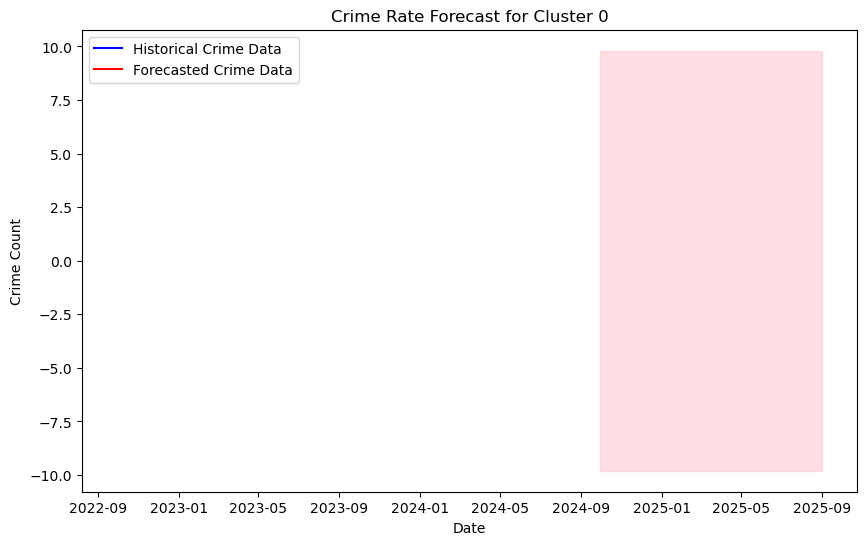

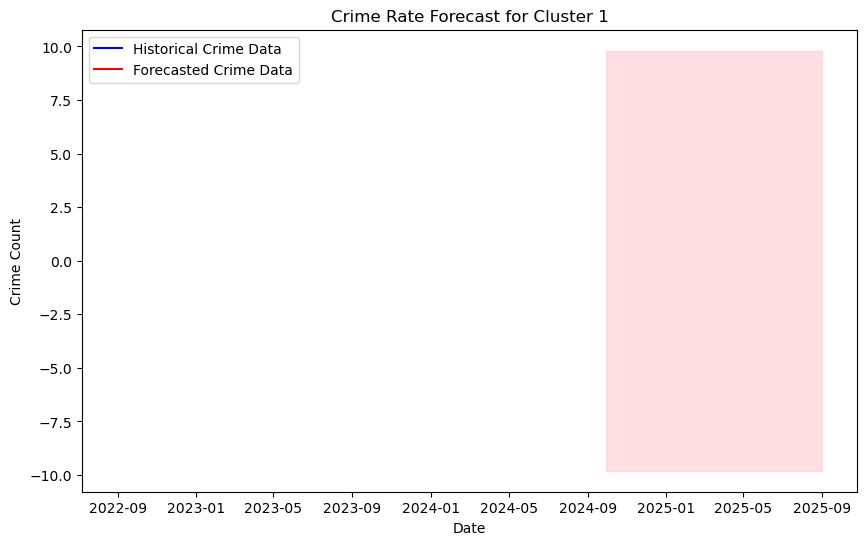

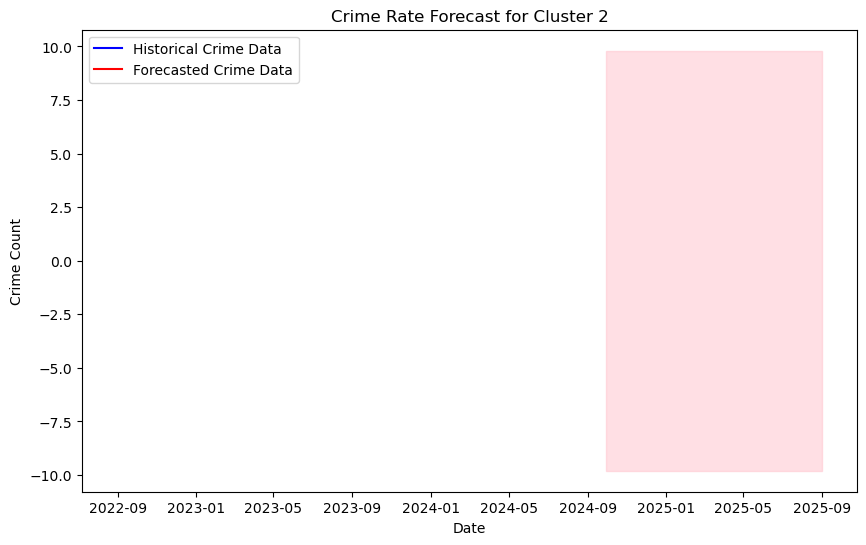

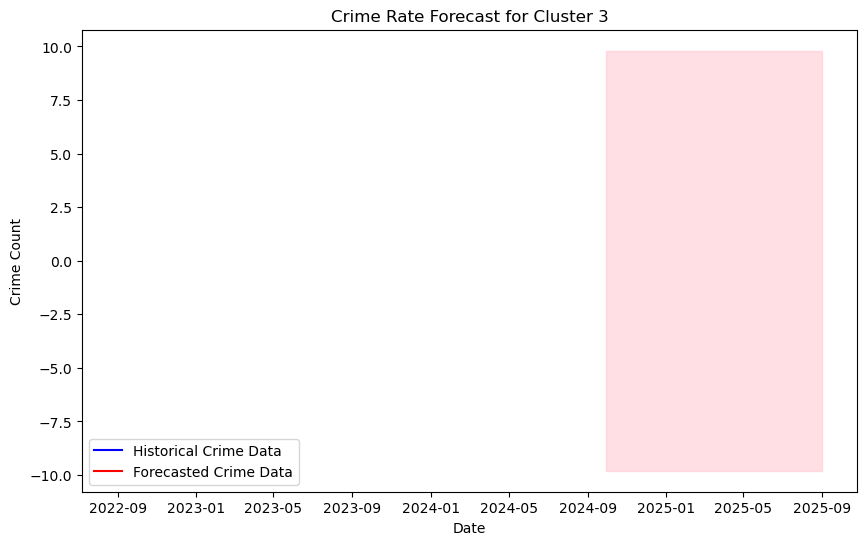

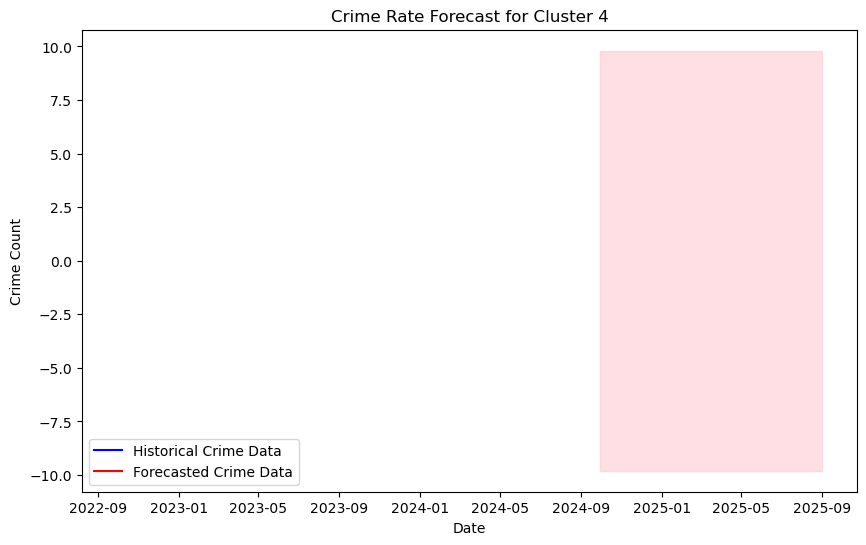

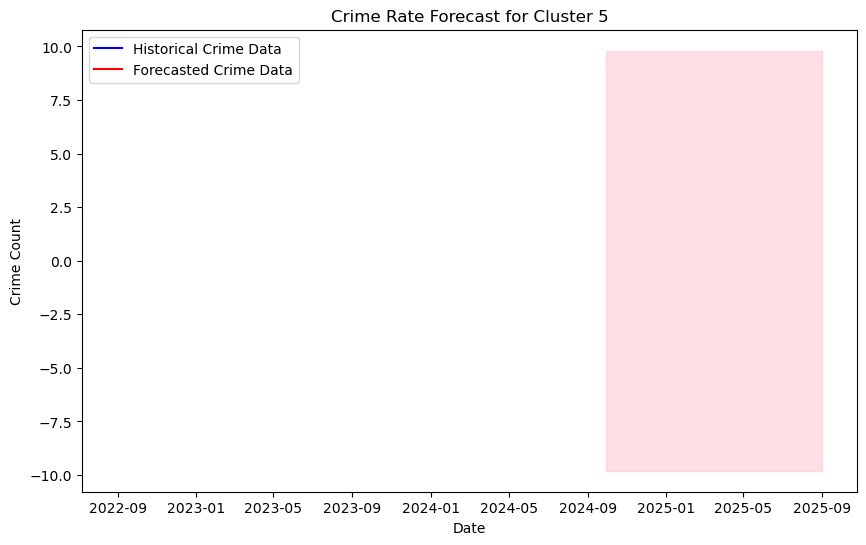

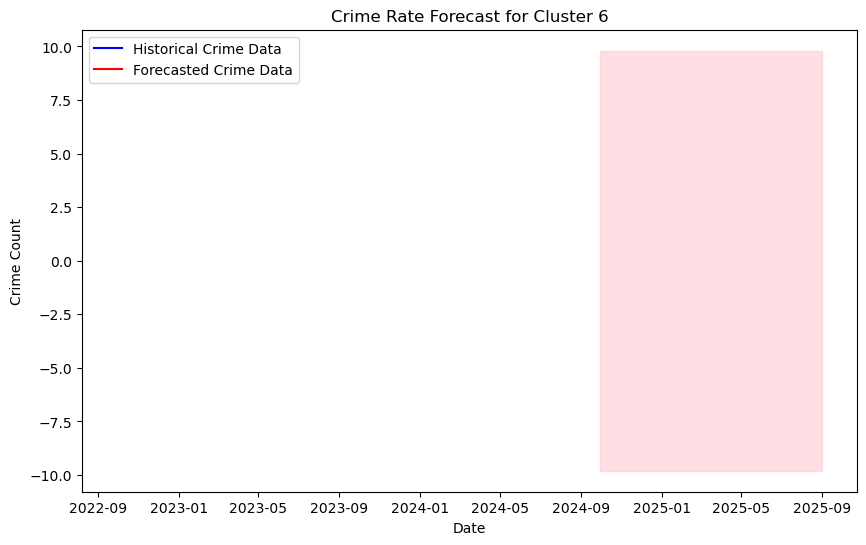

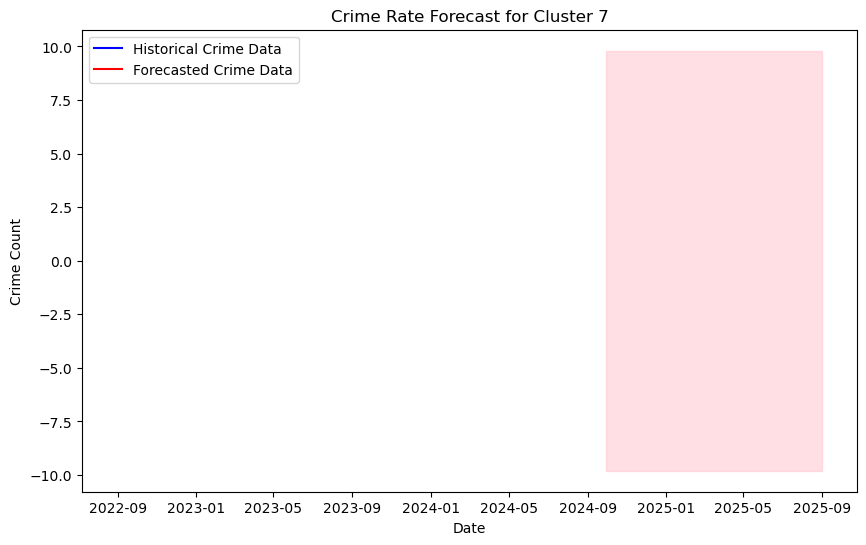

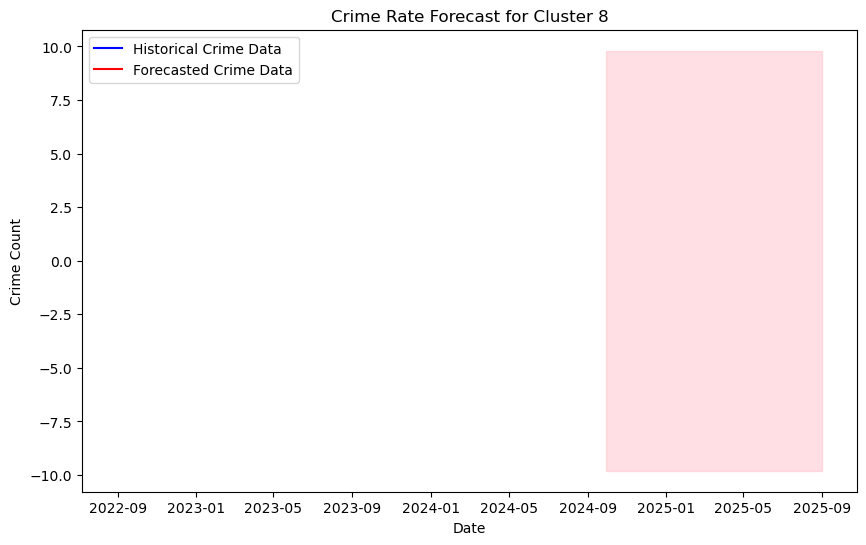

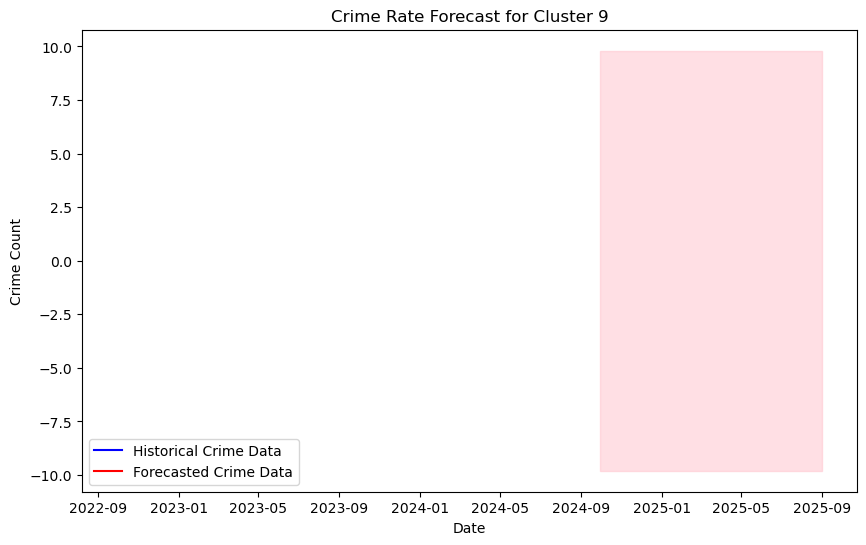

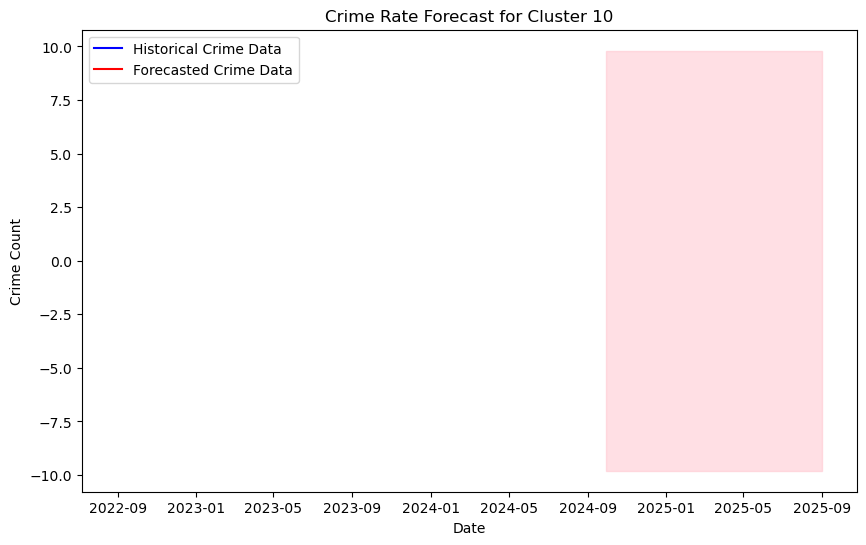

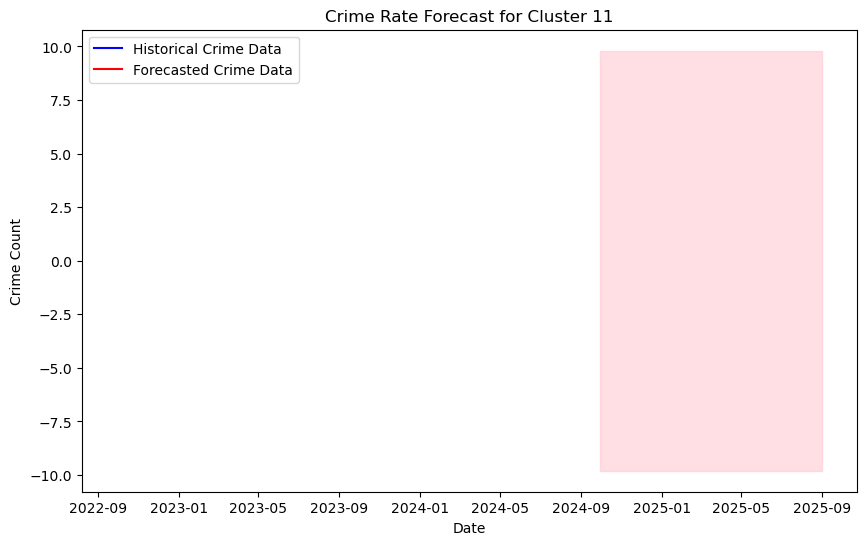

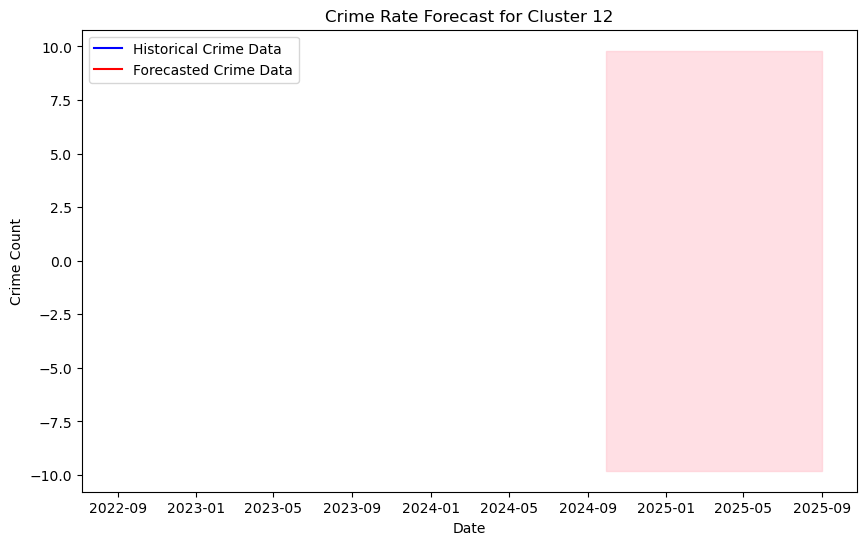

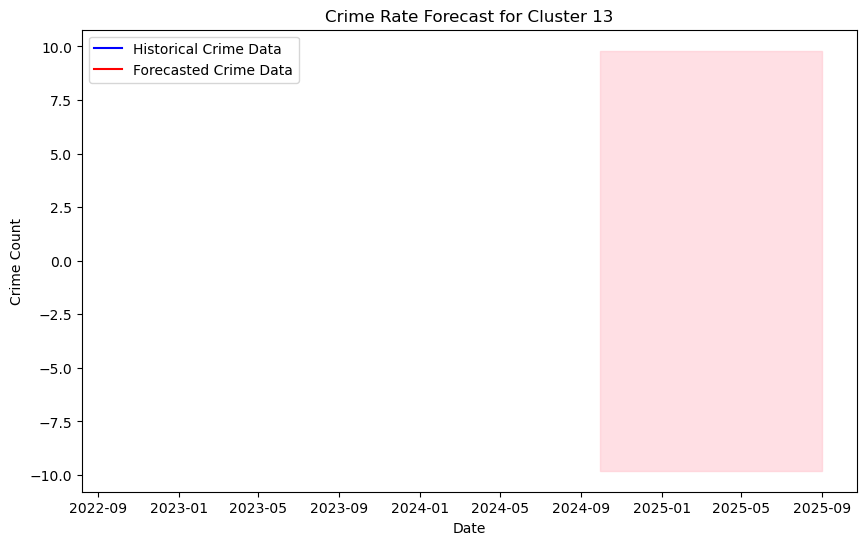

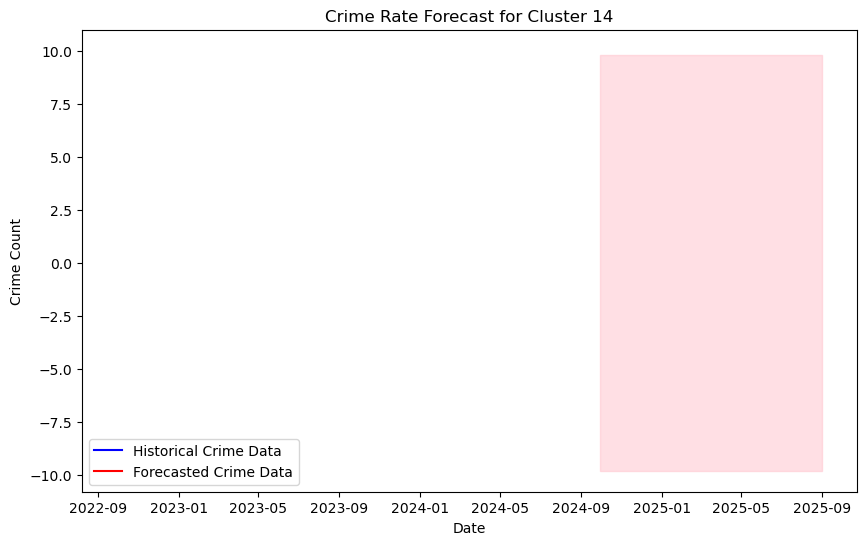

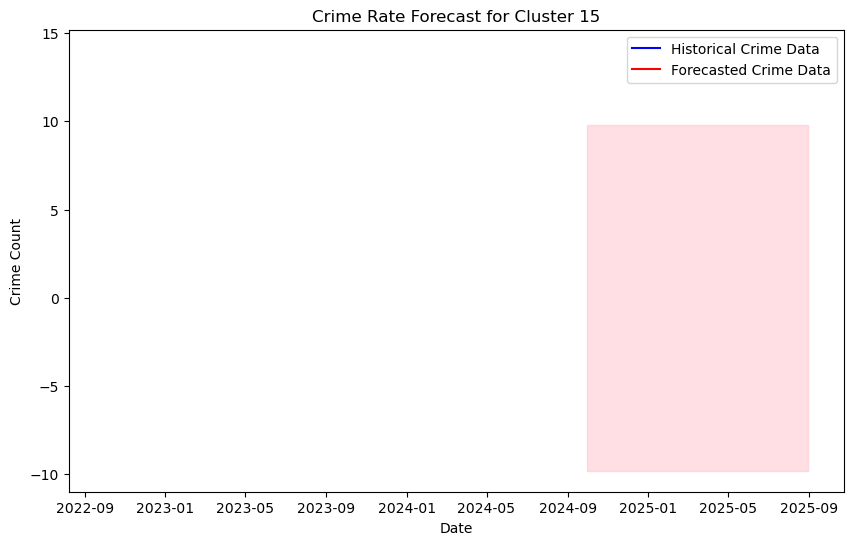

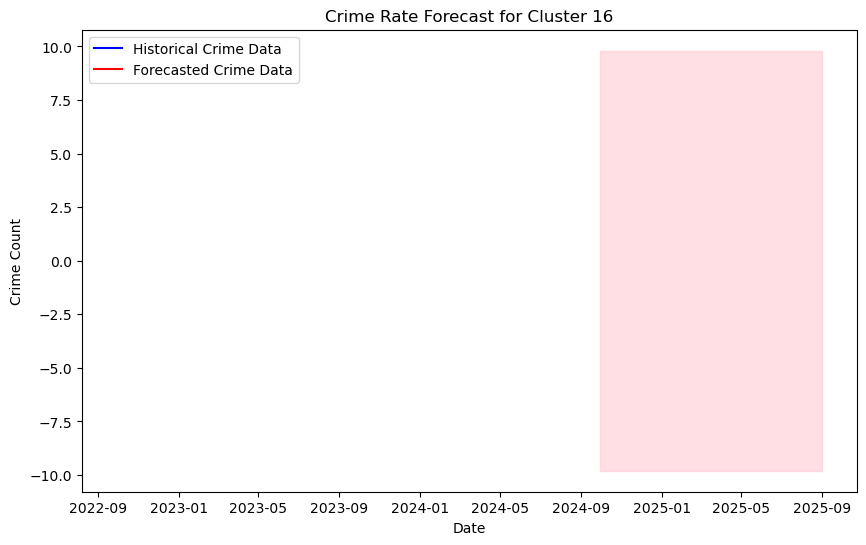

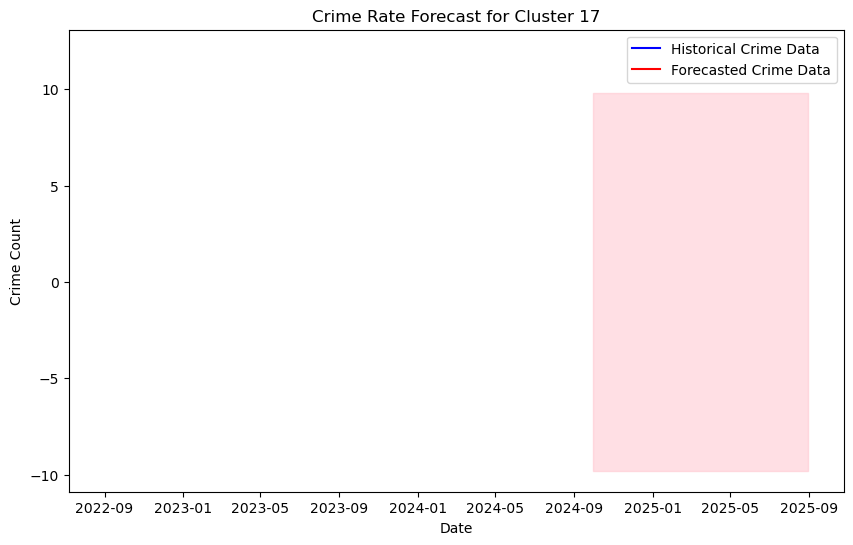

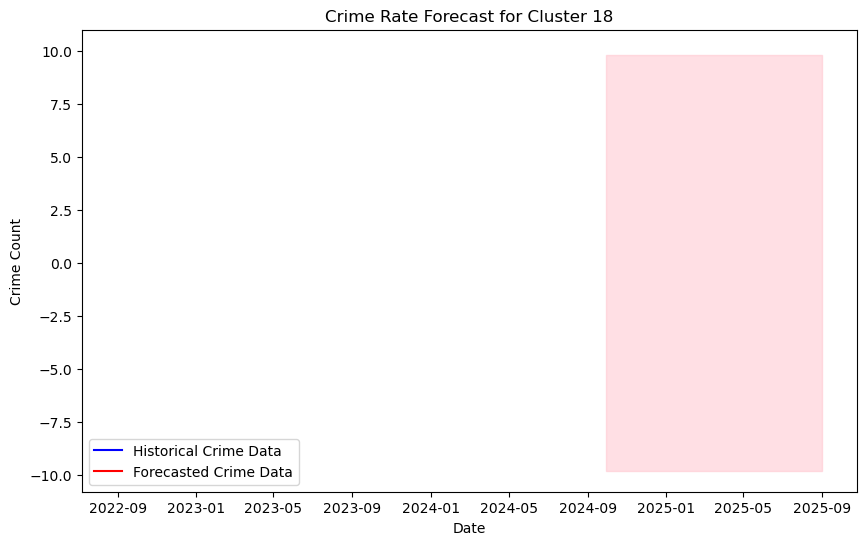

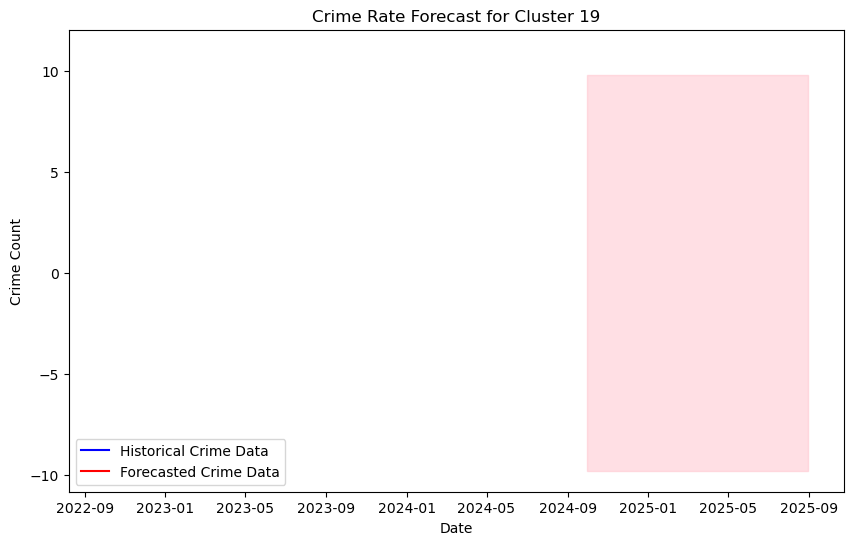

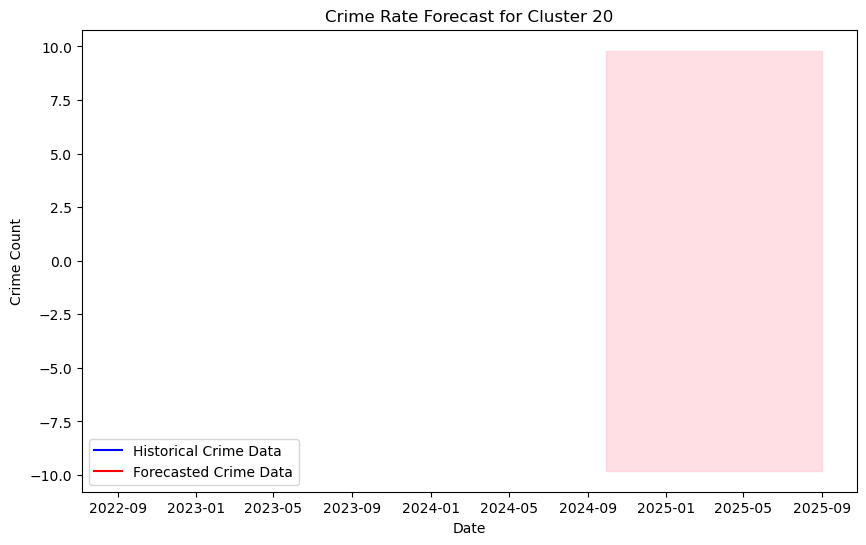

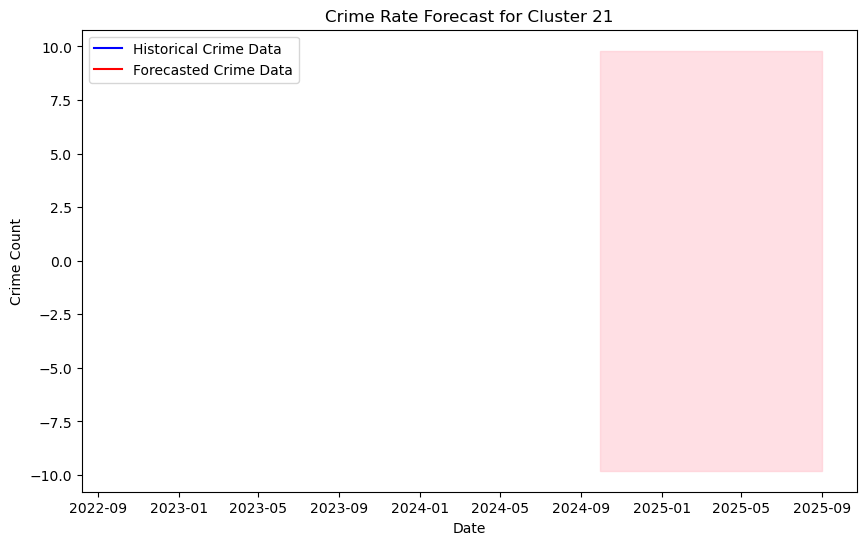

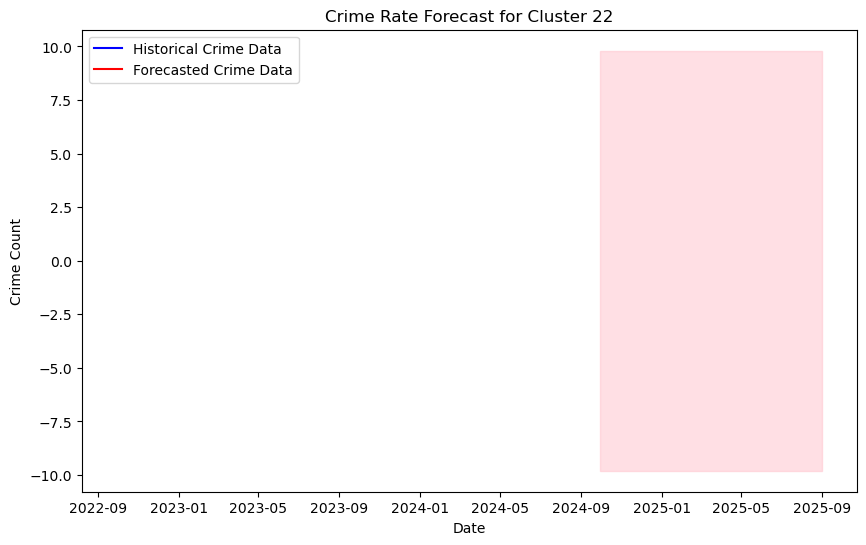

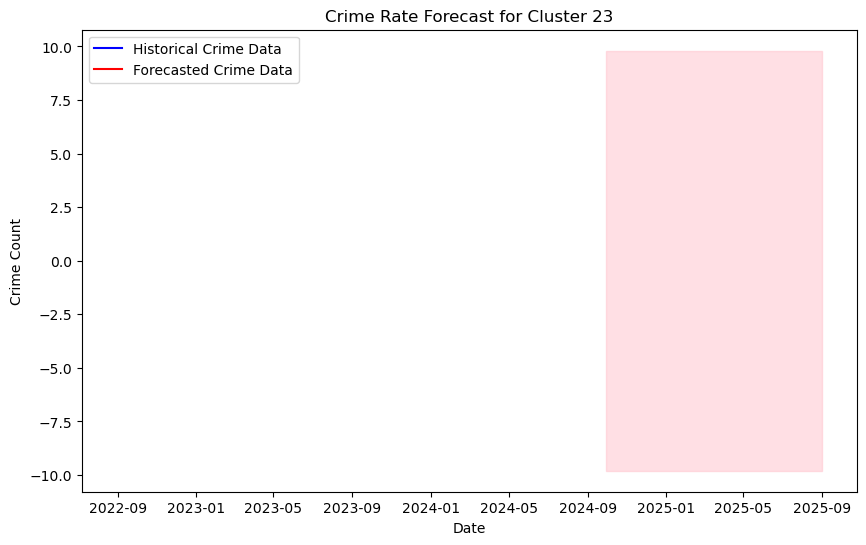

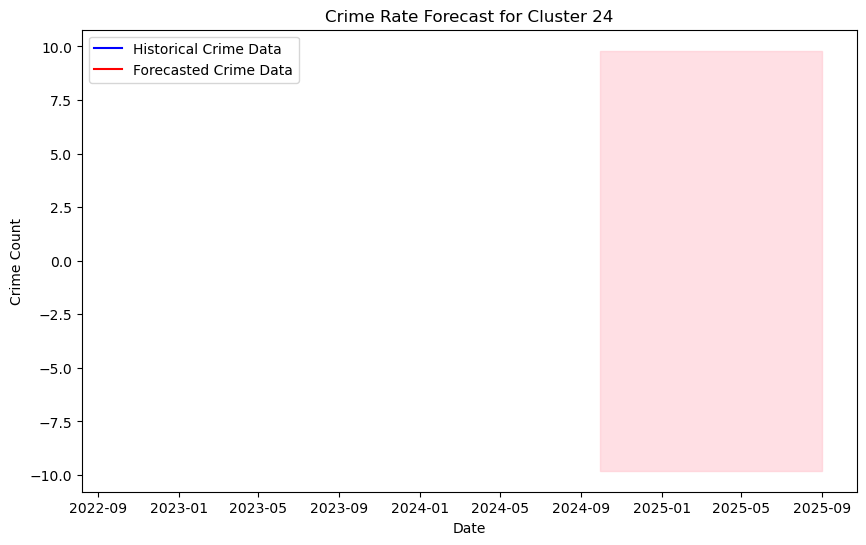

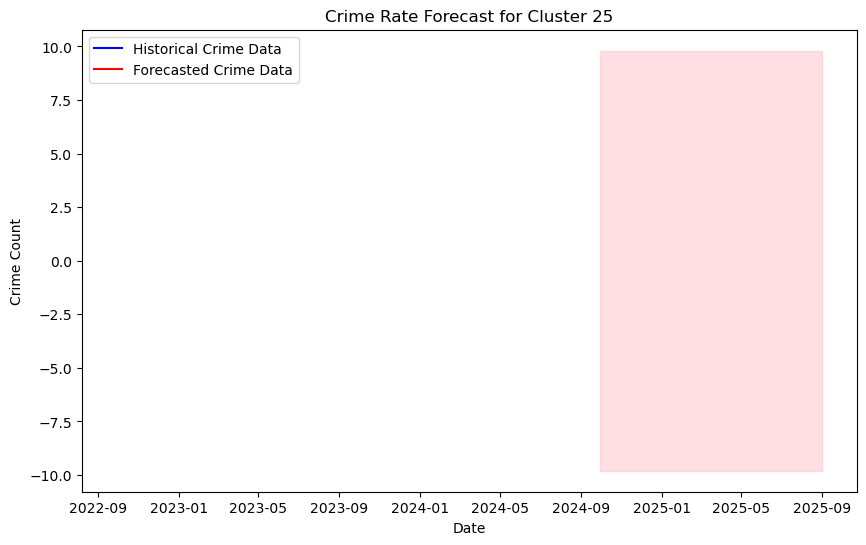

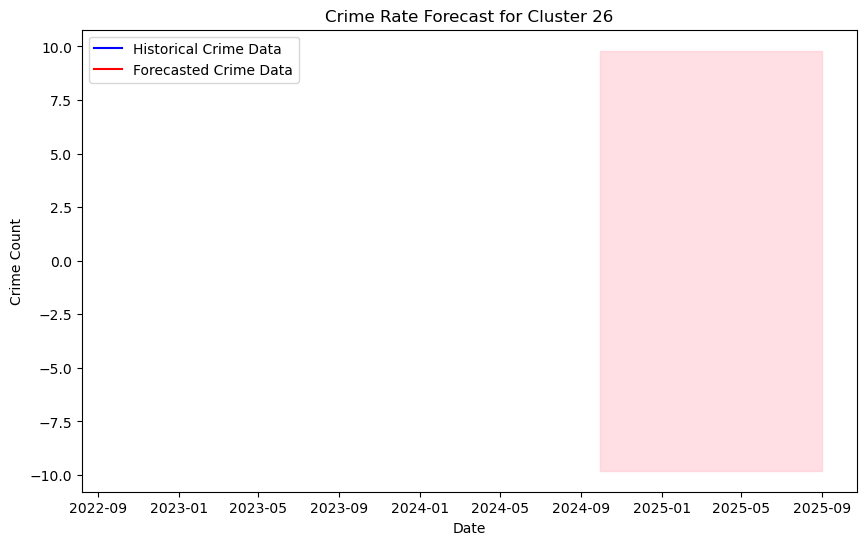

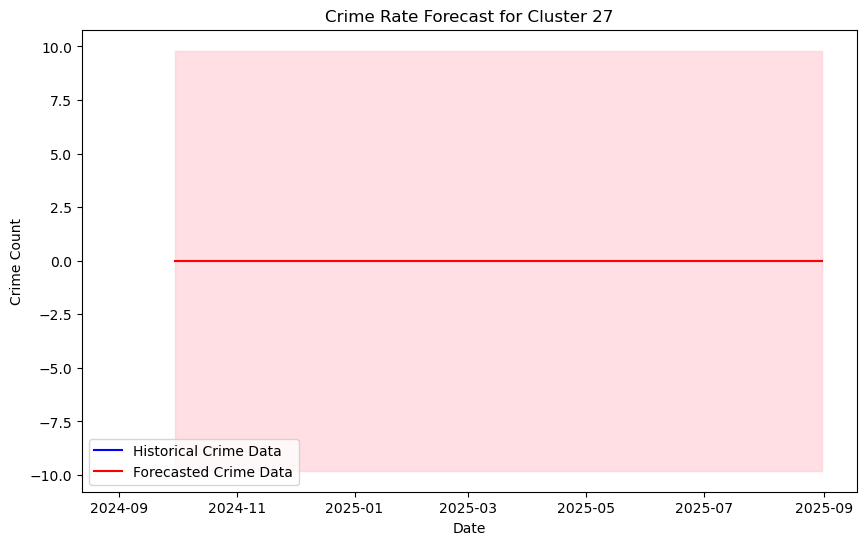

In [24]:
for cluster, forecast in forecast_results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_series[cluster], label='Historical Crime Data', color='blue')
    plt.plot(forecast, label='Forecasted Crime Data', color='red')
    plt.fill_between(forecast.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.5)
    plt.title(f'Crime Rate Forecast for Cluster {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Crime Count')
    plt.legend()
    plt.show()

In [ ]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Fit ARIMA model
model = auto_arima(crime_series, seasonal=False, stepwise=True, trace=True)

# Check the model summary
print(model.summary())

# Forecast future values
n_periods = 12  # Forecasting for the next 12 months
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(crime_series, label='Historical Crime Data', color='blue')
plt.plot(forecast, label='Forecasted Crime Data', color='red')
plt.fill_between(range(n_periods), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.5)
plt.title('Crime Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.show()
